# panc8 data set

In [19]:
library(tidyr)
library(magrittr)
library(Matrix)

library(ggplot2)
library(cowplot)
theme_set(theme_bw())

library(Seurat)
library(SeuratData)

library(kBET)
library(lisi)

In [2]:
source("../R/rvp.R")

In [8]:
panc8 <- LoadData("panc8")

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version



#### Explore data

In [48]:
print(panc8)
print(names(panc8@assays))
print(Layers(panc8[["RNA"]]))
print(colnames(panc8@meta.data))

In [7]:
# panc8 <- NormalizeData(panc8)
# panc8 <- FindVariableFeatures(panc8)
# panc8 <- ScaleData(panc8)

Warning message:
“The following arguments are not used: nselect”
Centering and scaling data matrix



In [20]:
panc8 <- RunPCA(panc8)

PC_ 1 
Positive:  SPARC, COL4A1, COL1A2, PXDN, COL3A1, COL1A1, COL15A1, PDGFRB, BGN, COL6A2 
	   COL5A1, SERPINH1, LGALS1, COL5A2, SFRP2, FN1, IGFBP4, MRC2, COL6A3, NID1 
	   AEBP1, THBS2, TIMP3, SERPINE1, FSTL1, LOXL2, FMOD, LUM, LAMA4, MMP2 
Negative:  C10orf10, CFC1, ERO1B, CRYBA2, FXYD2, IAPP, ARFGEF3, PRUNE2, ADCYAP1, PAPPA2 
	   EDN3, RBP4, BTG2, LOXL4, PFKFB2, BMP5, DLK1, PLCB4, PDK4, CDKN1C 
	   KLHL41, PLCE1, ENTPD3, AQP3, MMRN1, SERPINA1, FOXP2, WSCD2, WNK3, NT5DC3 
PC_ 2 
Positive:  SERPINA3, TACSTD2, SDC4, CD44, PDZK1IP1, CFB, IL32, REG1A, KRT18, GATM 
	   LCN2, KRT7, MUC1, SPINK1, ANPEP, TM4SF1, AKR1C3, PRSS1, ZFP36L1, SAT1 
	   KRT8, CPA2, CTRB2, GDF15, PRSS8, REG1B, CLDN4, C3, PNLIP, ANXA4 
Negative:  TIMP1, IAPP, ERO1B, PRUNE2, CFC1, CDKN1C, COL6A3, IGFBP5, CRYBA2, ADCYAP1 
	   PLCB4, EDN3, SPARC, ITGA1, ARFGEF3, PFKFB2, TCF4, RBP4, BMP5, ARID5B 
	   COL1A2, IGFBP4, COL3A1, BGN, PAPPA2, PDGFRB, COL15A1, INHBA, DLK1, ZEB1 
PC_ 3 
Positive:  CFTR, ATP5F1B, TSPAN8, AL35474

In [43]:
panc8 <- RunUMAP(panc8, dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:26:34 UMAP embedding parameters a = 0.9922 b = 1.112

16:26:34 Read 14890 rows and found 20 numeric columns

16:26:34 Using Annoy for neighbor search, n_neighbors = 30

16:26:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:26:39 Writing NN index file to temp file /tmp/RtmpXQhXzW/filedd6c5abd8291

16:26:39 Searching Annoy index using 1 thread, search_k = 3000

16:26:50 Annoy recall = 100%

16:26:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [51]:
ax1 <- DimPlot(panc8, reduction = "umap")
ax2 <- DimPlot(panc8, reduction = "umap", group.by = "celltype")

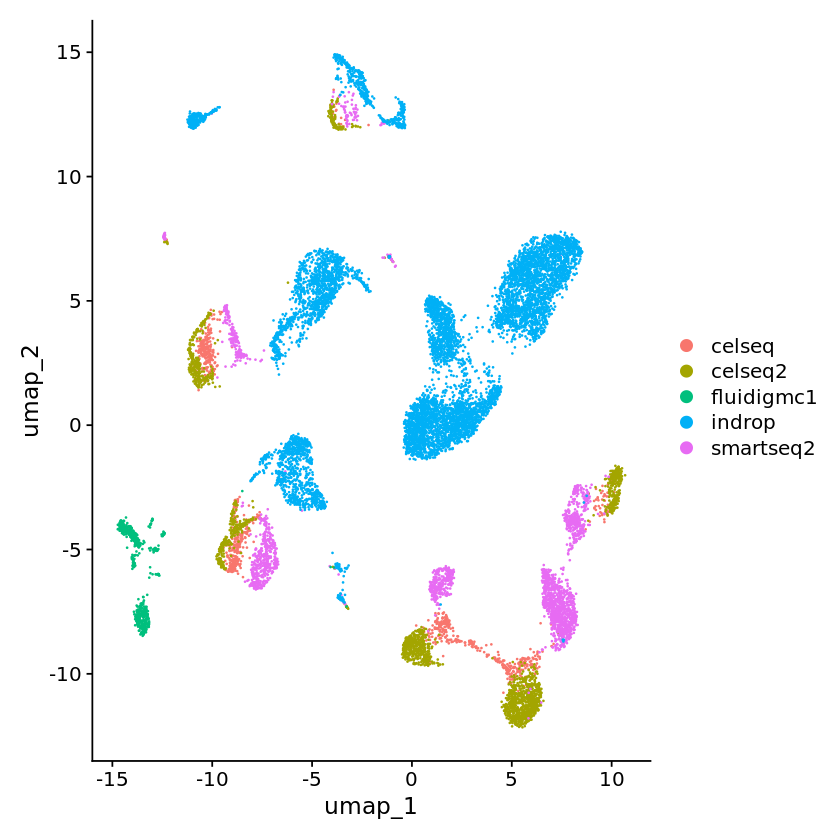

In [52]:
ax1

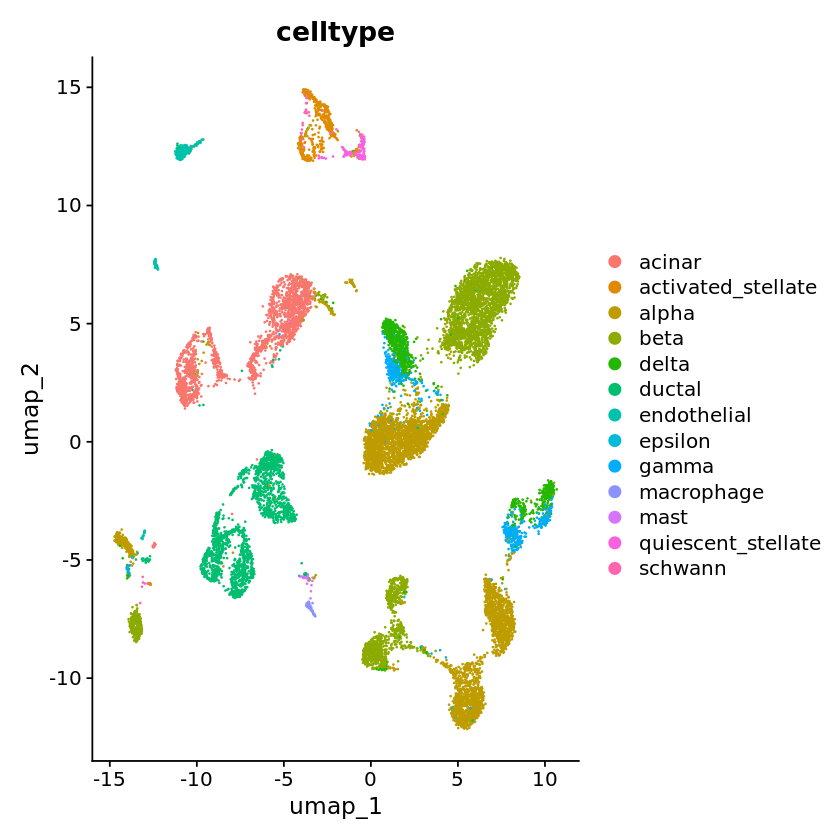

In [50]:
ax2

In [76]:
# print(VariableFeatures(panc8))
# print(head(Embeddings(panc8, "pca")))
# LayerData(panc8, layer = "data", assay = "RNA")
# panc8@meta.data

# Subset data
- Data sets: indrop3, smartseq2
- Cell types: alpha, ductal

In [60]:
panc2 <- subset(panc8,
  dataset %in% c("indrop3", "smartseq2") &
  celltype %in% c("alpha", "ductal")
)

#### QC - Cells

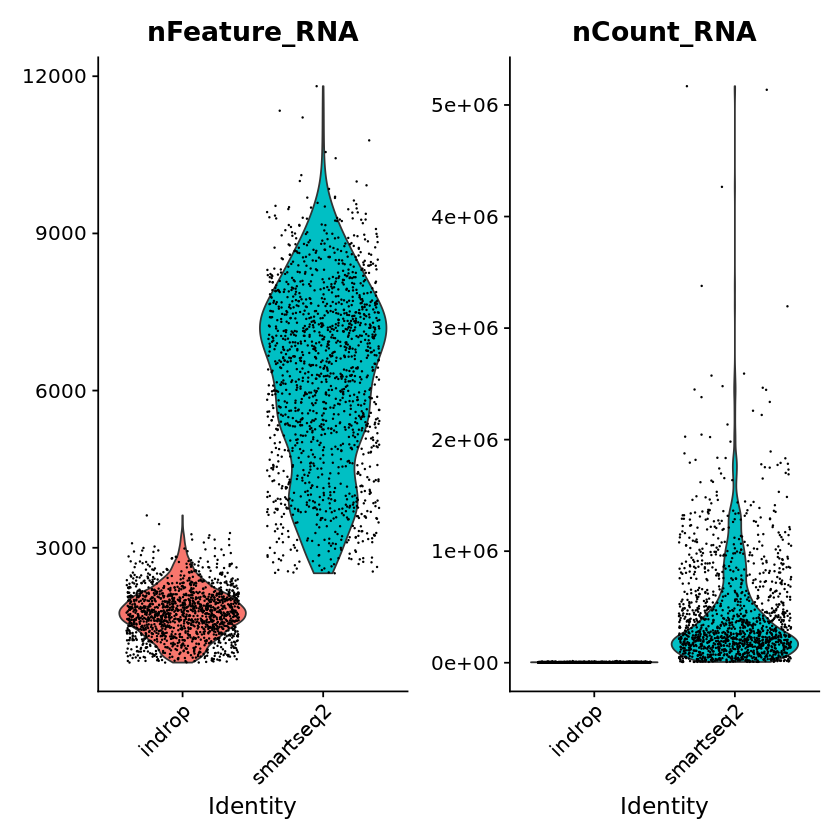

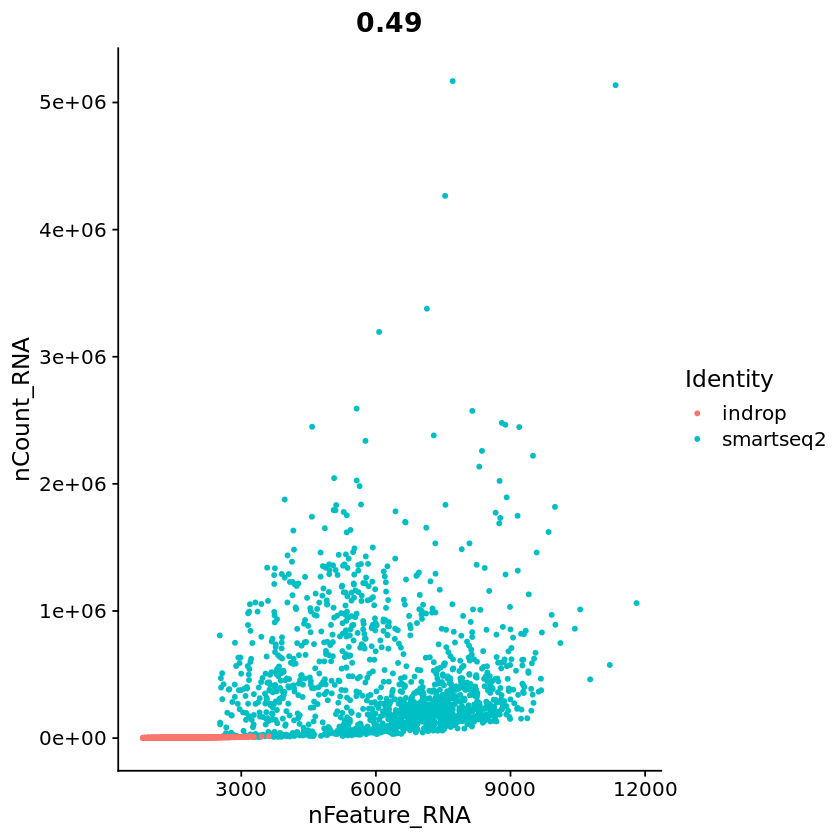

In [61]:
VlnPlot(panc2, features = c("nFeature_RNA", "nCount_RNA"))
FeatureScatter(panc2, feature1 = "nFeature_RNA", feature2 = "nCount_RNA")

In [62]:
panc2 <- subset(panc2,
  subset = nCount_RNA < 1.5e6 & nFeature_RNA < 10000
)

#### QC - Filter features

In [75]:
counts <- LayerData(panc2, "counts")
nfeat_genes <- rowSums(counts > 0)
# hist(nfeat_genes[nfeat_genes < 300])

# Filter features with many dropouts
panc2fltr <- panc2[nfeat_genes > 150, ]

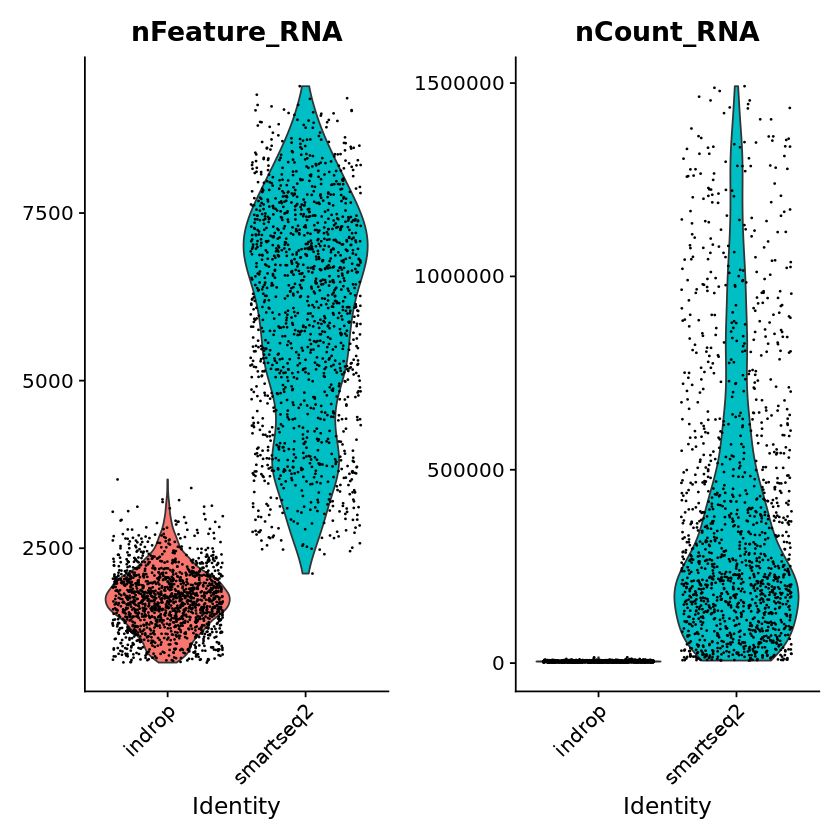

In [81]:
VlnPlot(panc2fltr, features = c("nFeature_RNA", "nCount_RNA"))

## Expt: Degrees of imbalance
- 2:2, 2:3, 2:4, 2:5, 2:6
- Each batch: 480 cells

In [114]:
metadata <- panc2fltr@meta.data[c("celltype", "dataset")]

In [115]:
smartseq2_alpha <- which(metadata[["celltype"]] == "alpha" & metadata[["dataset"]] == "smartseq2")
smartseq2_ductal <- which(metadata[["celltype"]] == "ductal" & metadata[["dataset"]] == "smartseq2")
indrop3_alpha <- which(metadata[["celltype"]] == "alpha" & metadata[["dataset"]] == "indrop3")
indrop3_ductal <- which(metadata[["celltype"]] == "ductal" & metadata[["dataset"]] == "indrop3")

In [125]:
nperbatch <- 480
rng <- seq(2, 6)
list_imbal <- list()

for (i in rng) {
  frac <- 2 / (i + 2)
  n1 <- round(frac * nperbatch)
  n2 <- round((1 - frac) * nperbatch)
  idx1 <- sample(smartseq2_alpha, n1)
  idx2 <- sample(smartseq2_ductal, n2)
  idx3 <- sample(indrop3_alpha, n2)
  idx4 <- sample(indrop3_ductal, n1)
  idx <- sort(c(idx1, idx2, idx3, idx4))
  list_imbal <- c(list_imbal, panc2fltr[, idx])
}

names(list_imbal) <- rng

In [160]:
obj <- list_imbal[[5]]

[1] 0.2932275


In [189]:
batch_effects <- function(obj, batch, cls) {
  X <- LayerData(obj)
  metadata <- obj@meta.data
  kbet_size <- dim(obj)[2]
  
  RVP <- rvp(obj, batch, cls)
  kbet_estimate <- kBET(
    Matrix::t(X),
    obj[[batch]],
    testSize = kbet_size, n_repeat = 1
  )
  rejection_rate <- kbet_estimate$summary$kBET.observed[1]
  lisi_results <- compute_lisi(
    Matrix::t(X),
    metadata,
    c(batch, cls)
  )
  blisi <- mean(lisi_results[[batch]])
  
  return(c(rvp = RVP, kbet = rejection_rate, lisi = blisi))
}

In [191]:
results <- lapply(list_imbal, batch_effects)

In [195]:
results1 <- results %>%
  data.frame()
# %>%
#   t() %>%
#   data.frame()
# rownames(metrics) <- substring(rownames(metrics), 2)

In [199]:
saveRDS(results, "../tmp/results.rds")

In [3]:
results <- readRDS("../tmp/results.rds")

In [37]:
results1 <- data.frame(lapply(results, unlist))
colnames(results1) <- substring(colnames(results1), 2, 2)
results1[["metric"]] <- rownames(results1)

In [40]:
results2 <- gather(results1, "imbalance", "value", -c("metric"))

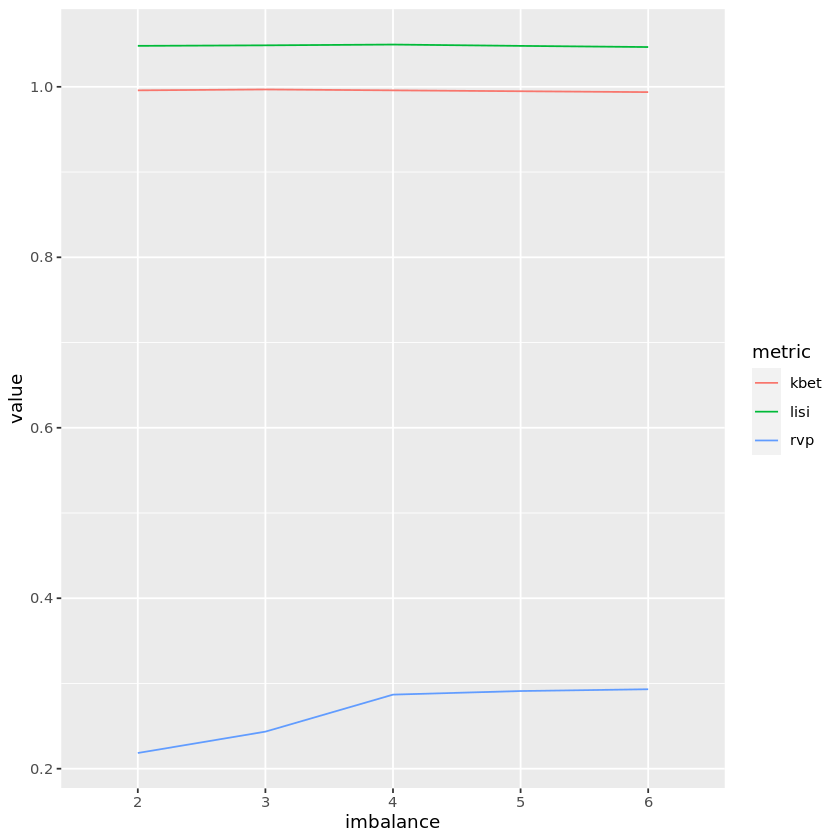

In [46]:
ggplot(results2) +
  geom_line(aes(x = imbalance, y = value, color = metric, group = metric))

#### RVP

In [22]:
# panc8_flt <- NormalizeData(panc8_flt)
# panc8_flt <- FindVariableFeatures(panc8_flt, selection.method = "vst", nfeatures = 2000)

#### Plot: RVP

In [21]:
SS <- rvp$sum_squares
# sort by ss_total
SS_t <- SS[order(-SS$ss_total), ]
# sort by ss_batch
SS_b <- SS[order(-SS$ss_batch), ]
# sort by mean
counts <- GetAssayData(panc8_fltr)
SS_m <- SS[order(-rowMeans(counts)), ]
# sort by mean in top 10% cells
mean_counts_10 <- apply(counts, 1, function(x) {
  pct <- 0.1
  mean(sort(x, decreasing = TRUE)[seq_len(pct * ncol(counts))])
})
SS_m10 <- SS[order(-mean_counts_10), ]

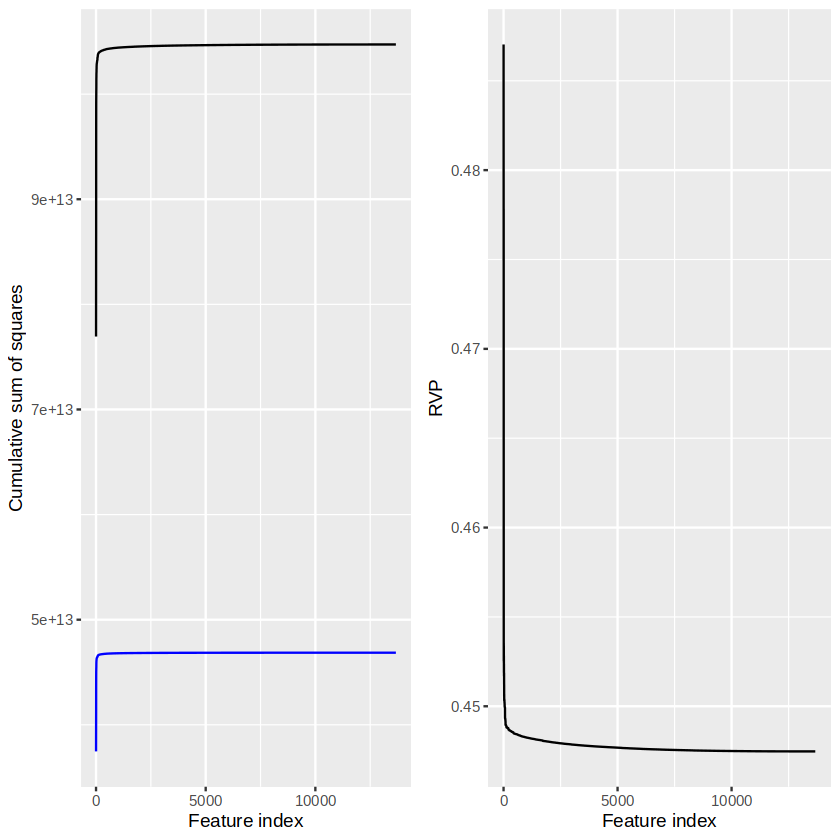

In [47]:
ax_rvp <- plot.rvp(SS_m10, cex = .5)
ax_rvp

In [48]:
file <- "~/Dropbox/tmp/ssm10-panc8.pdf"
ggsave(file, ax_rvp, width = 6, height = 3)

#### Plots

In [50]:
panc8_fltr <- ScaleData(panc8_fltr)

Centering and scaling data matrix



In [52]:
panc8_fltr <- RunPCA(panc8_fltr, features = rownames(panc8_fltr), npcs = 20)

PC_ 1 
Positive:  ERCC-00074, ERCC-00004, ERCC-00130, ERCC-00171, ERCC-00096, ERCC-00046, ERCC-00002, ERCC-00108, HNRPDL, ERCC-00113 
	   MTRNR2L1, C17orf76-AS1, ERCC-00003, MTRNR2L8, C22orf32, LSMD1, MRP63, ERCC-00042, ERCC-00009, ERCC-00043 
	   ERCC-00060, MTRNR2L2, EFHA1, MLL5, SC5DL, MLL, LOC550643, ERCC-00111, MLL3, KLHDC5 
Negative:  SERF2, SRP14, GABARAP, HINT1, COX4I1, COX7C, RPL8, TMBIM6, CD63, YWHAE 
	   RPL30, RPL31, MYL6, COX6C, PARK7, RPS11, SSR4, RPS14, RPL27, ATP6V0E1 
	   NDUFS5, RPLP1, PFDN5, COX6A1, SNRPD2, CALM2, COX7A2, NDUFB4, SOD1, EIF1 
PC_ 2 
Positive:  TCEB2, LOC284889, ATP5G2, ATP5J2, MIR6850, USMG5, ATP5L, ATPIF1, RPS14P3, ATP5I 
	   NACA2, ATP5A1, MRPS21, ATP5G3, ATP5H, PSMB3, ATP5EP2, C14orf2, ATP5E, SKP1P2 
	   GNB2L1, ATP5B, ATP5C1, CFL1, TMEM66, ATP6V0C, ATP5D, FAM127A, ATP5O, ATP5F1 
Negative:  AC087473.1, MIPOL1, TMEM45A, SAG, ASTN2, LINC00504, MEFV, KIAA1328, ADAMTSL3, CRX 
	   LINC02202, CYSLTR1, LINC02503, AC011453.1, TMEM212, LINC01609, CFAP54, AC

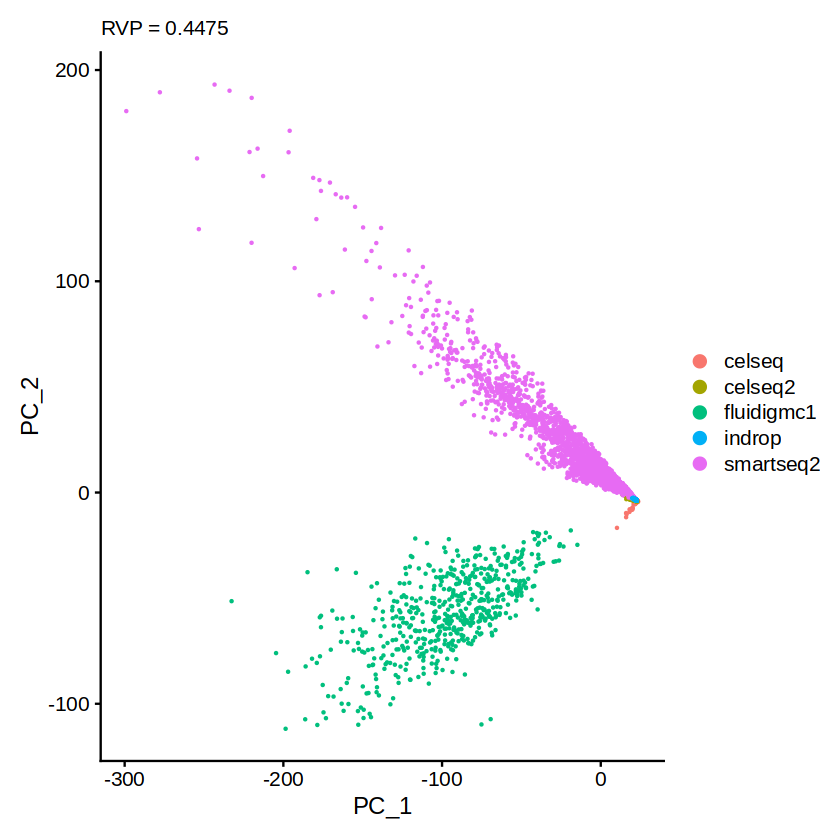

In [57]:
ax_pca <- DimPlot(panc8_fltr) +
  labs(subtitle = sprintf("RVP = %.4f", rvp$percentage))
ax_pca
file <- '~/Dropbox/tmp/pca-panc8_fltr.pdf'
ggsave(file, ax_pca, width = 6, height = 4)

In [58]:
panc8_fltr <- RunUMAP(panc8_fltr, dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
02:43:22 UMAP embedding parameters a = 0.9922 b = 1.112

02:43:22 Read 7515 rows and found 20 numeric columns

02:43:22 Using Annoy for neighbor search, n_neighbors = 30

02:43:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:43:23 Writing NN index file to temp file /tmp/Rtmp0F6CaJ/file31e851faaba7

02:43:23 Searching Annoy index using 1 thread, search_k = 3000

02:43:25 Annoy recall = 100%

02:43:25 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

In [62]:
head(panc8_fltr@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,tech,replicate,assigned_cluster,celltype,dataset,pct_mito
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
D101_5,D101,4587.751,1959,celseq,celseq,NA,gamma,celseq,0
D101_7,D101,28806.188,4124,celseq,celseq,NA,acinar,celseq,0
D101_10,D101,6679.794,2382,celseq,celseq,NA,alpha,celseq,0
D101_13,D101,8745.098,2918,celseq,celseq,NA,delta,celseq,0
D101_14,D101,4996.479,2230,celseq,celseq,NA,beta,celseq,0
D101_17,D101,13339.853,3912,celseq,celseq,NA,ductal,celseq,0


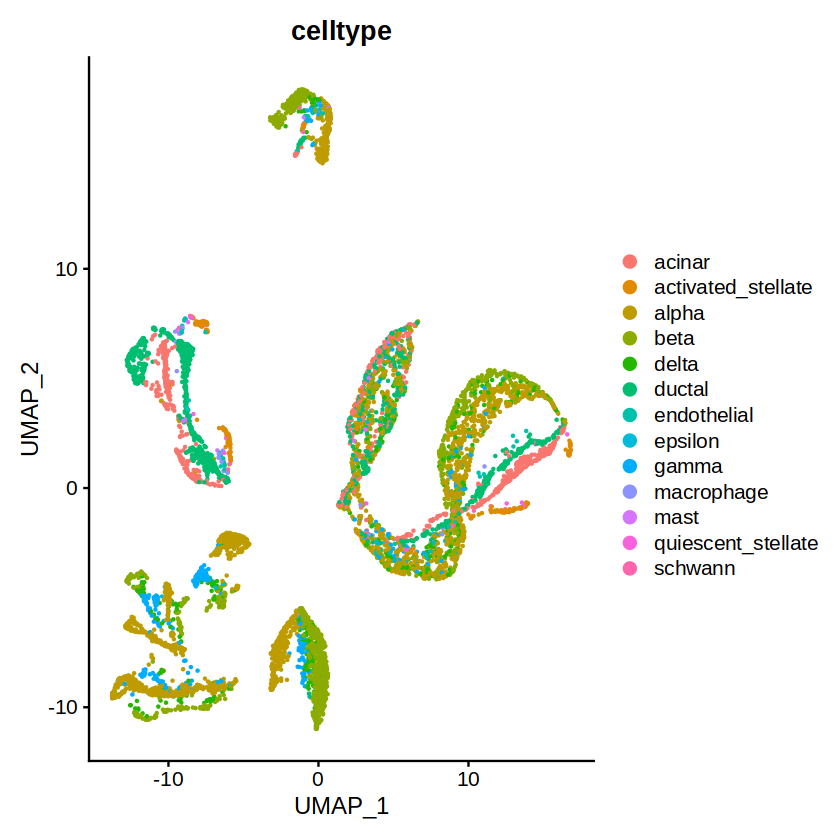

In [63]:
ax_umap <- DimPlot(panc8_fltr, reduction = "umap", group.by = "celltype")
ax_umap

In [64]:
file <- '~/Dropbox/tmp/umap_celltype-panc8_fltr.pdf'
ggsave(file, ax_umap, width = 6, height = 4)

# Explore

In [60]:
subset(AvailableData(), species == "mouse")

,Dataset,Version,Summary,species,system,ncells,tech,seurat,default.dataset,disk.datasets,other.datasets,notes,Installed,InstalledVersion
,<chr>,<pckg_vrs>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<pckg_vrs>
mousecortexref.SeuratData,mousecortexref,1.0.0,Azimuth Reference: mousecortex,mouse,motor cortex,159738,10x v3,NA,NA,NA,NA,NA,FALSE,NA
ssHippo.SeuratData,ssHippo,3.1.4,Slide-seq v2 dataset of mouse hippocampus,mouse,hippocampus,NA,slideseq v2,NA,raw,NA,NA,NA,FALSE,NA
stxBrain.SeuratData,stxBrain,0.1.1,10X Genomics Visium Mouse Brain Dataset,mouse,brain,12167,visium,NA,NA,NA,"posterior1, posterior2, anterior1, anterior2",One sample split across four datasets as paired anterior/posterior slices,FALSE,NA
stxKidney.SeuratData,stxKidney,0.1.0,10X Genomics Visium Mouse Kidney Dataset,mouse,kidney,1438,visium,NA,raw,NA,NA,NA,FALSE,NA
